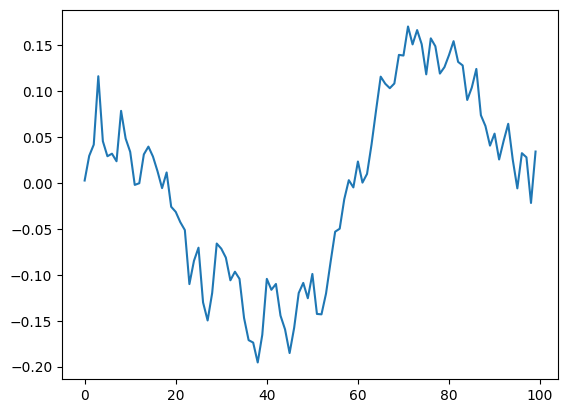

In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

n_samples = 100
# Standard deviation of the increments
increment_std = 0.01  # Adjust as needed to control the overall noise level

# Generate incremental steps
increments = np.random.normal(0, increment_std, n_samples)

# Generate the random walk (Brownian noise) by cumulatively summing the increments
brownian_noise = np.cumsum(increments)

# Normalize or scale the Brownian noise to match a specific standard deviation, if needed
target_std = 0.1
actual_std = np.std(brownian_noise)
brownian_noise_scaled = brownian_noise * (target_std / actual_std)

plt.plot(range(len(brownian_noise_scaled)), brownian_noise_scaled)
plt.show()


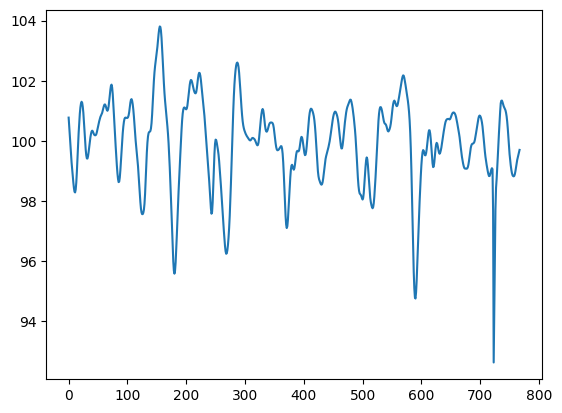

In [6]:
import pandas as pd
csv_file = './data/data_easier.csv'
column_name = 'target'

# Read the CSV file using pandas
df = pd.read_csv(csv_file)

# Select the column and convert it to a NumPy array
column_data = df[column_name].to_numpy()

plt.plot(range(len(column_data)),column_data)
plt.show()

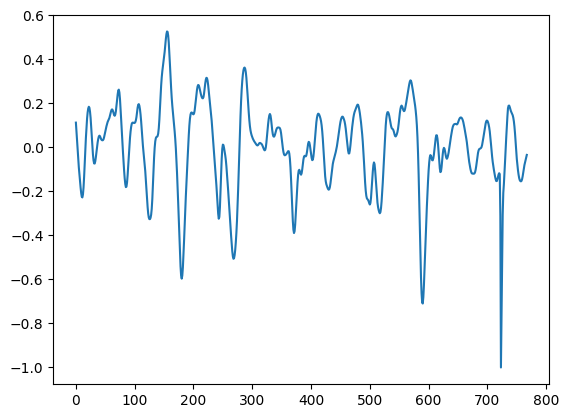

In [7]:
import pandas as pd
import numpy as np
csv_file = './data/data_easier.csv'
column_name = 'target'

# Read the CSV file using pandas
df = pd.read_csv(csv_file)

# Select the column and convert it to a NumPy array
column_data = df[column_name].to_numpy()
column_data = column_data-np.mean(column_data)
column_data = column_data /np.max(np.abs(column_data))
plt.plot(range(len(column_data)),column_data)
plt.show()

In [2]:
from utils import get_fft_harmonics
import torch
amplitudes, phases = get_fft_harmonics(torch.from_numpy(column_data), len(column_data))
x = range(len(amplitudes))
plt.plot(x, amplitudes)
plt.xscale('log')
# plt.xticks(x)
plt.show()
plt.plot(x, phases)
plt.xscale('log')
plt.show()

NameError: name 'column_data' is not defined

# Generated

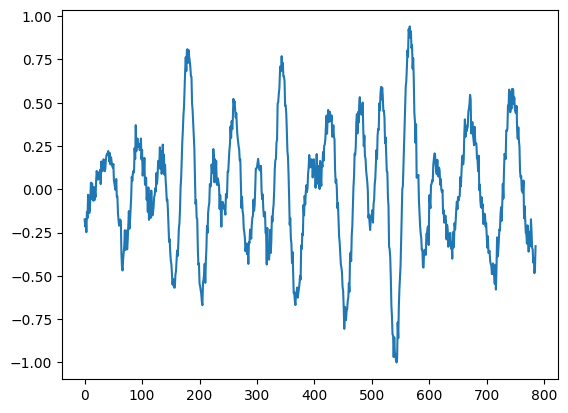

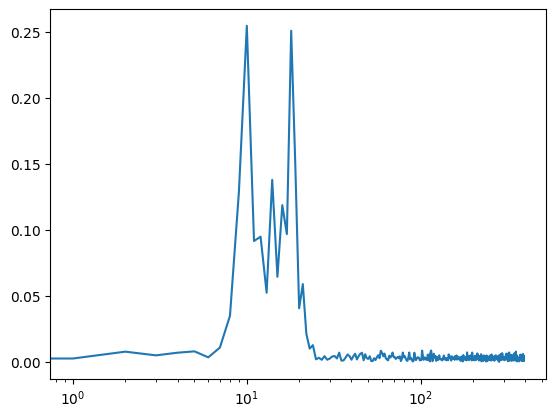

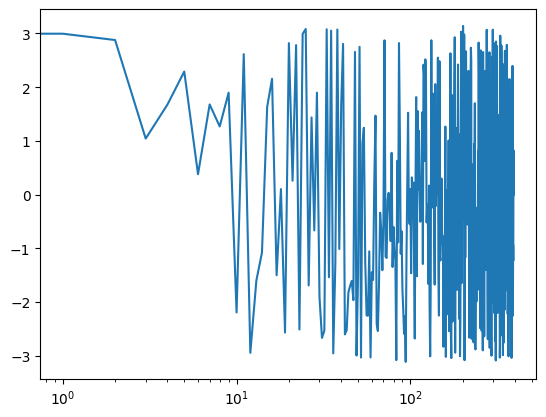

In [4]:
from utils import generate_signal_with_amplitude_mod
import matplotlib.pyplot as plt
# def generate_signal_modified(num_samples=118, noise=False, num_components=(3, 7), periods_range=(2, 100), deviation_range=(0.6, 1.4)):
#     """
#     Generate a signal where components' frequencies are centered around a reference frequency.
#     
#     :param num_samples: Total number of samples in the signal
#     :param noise: If True, add Gaussian noise to the signal
#     :param num_components: Tuple indicating the min and max number of harmonic components
#     :param periods_range: The range of periods for the reference component
#     :param deviation_range: Range of deviation for sampling periods around the reference component's period
#     :return: Sample indices and generated signal as torch tensors
#     """
#     # Ensure input types and values are valid
#     if isinstance(num_components, int):
#         num_components = (num_components, num_components + 1)
#     else:
#         assert num_components[0] < num_components[1], "num_components range is invalid."
#     
#     if isinstance(periods_range, int):
#         periods_range = (periods_range, periods_range + 1)
#     else:
#         assert periods_range[0] <= periods_range[1], "periods_range is invalid."
# 
#     # Randomly choose the number of components
#     num_components = np.random.randint(*num_components)
# 
#     # Generate the reference component's period
#     reference_period = np.random.randint(*periods_range, 1)
# 
#     # Generate periods for other components around the reference period within the deviation range
#     periods = reference_period * np.random.uniform(*deviation_range, num_components)
#     periods = np.clip(periods, periods_range[0], periods_range[1])  # Ensure periods are within the specified range
# 
#     # Generate random phases and amplitudes
#     phases = np.random.rand(num_components) * 2 * np.pi
#     amplitudes = np.random.rand(num_components)
#     amplitudes /= np.sum(amplitudes)  # Normalize amplitudes
# 
#     # Sample indices
#     samples = np.arange(num_samples)
# 
#     # Generate signal
#     signal = sum(amplitude * np.sin(2 * np.pi * (1 / period) * samples + phase)
#                  for amplitude, period, phase in zip(amplitudes, periods, phases))
#     signal = signal / np.max(np.abs(signal))  # Normalize signal
# 
#     # Add noise, if requested
#     if noise:
#         noise = np.random.normal(0, 0.1, signal.shape)
#         signal += noise
#         signal = signal / np.max(np.abs(signal))  # Normalize signal again
# 
#     return torch.from_numpy(samples).float(), torch.from_numpy(signal).float()

# samples,y = generate_signal_modified(num_samples=786, num_components=(10, 15), periods_range=(40,80), noise=True)

# def generate_signal_with_amplitude_decay(num_samples=118, noise=False, num_components=(3, 7), periods_range=(2, 100), deviation_range=(0.8, 1.2)):
#     """
#     Generate a signal where components' frequencies are centered around a reference frequency
#     and amplitudes decay based on the distance from the reference frequency.
#     
#     :param num_samples: Total number of samples in the signal
#     :param noise: If True, add Gaussian noise to the signal
#     :param num_components: Tuple indicating the min and max number of harmonic components
#     :param periods_range: The range of periods for the reference component
#     :param deviation_range: Range of deviation for sampling periods around the reference component's period
#     :return: Sample indices and generated signal as torch tensors
#     """
#     if isinstance(num_components, int):
#         num_components = (num_components, num_components + 1)
#     else:
#         assert num_components[0] < num_components[1]
#     
#     if isinstance(periods_range, int):
#         periods_range = (periods_range, periods_range + 1)
#     else:
#         assert periods_range[0] <= periods_range[1]
# 
#     # Randomly choose the number of components
#     num_components = np.random.randint(*num_components)
# 
#     # Generate the reference component's period
#     reference_period = np.random.randint(*periods_range, 1)
# 
#     # Generate periods for other components around the reference period within the deviation range
#     periods = np.random.normal(reference_period,scale=40,size=num_components)
#     periods = np.clip(periods, periods_range[0], periods_range[1])  # Ensure periods are within the specified range
# 
#     # Generate random phases
#     phases = np.random.rand(num_components) * 2 * np.pi
# 
#     # Calculate amplitudes with decay based on distance from the reference period
#     distance_from_reference = np.abs(periods - reference_period)
#     amplitudes = 1 / (1 + 0.5*distance_from_reference)  # Simple reciprocal function for decay
#     amplitudes /= np.sum(amplitudes)  # Normalize amplitudes
# 
#     # Sample indices
#     samples = np.arange(num_samples)
# 
#     # Generate signal
#     signal = sum(amplitude * np.sin(2 * np.pi * (1 / period) * samples + phase)
#                  for amplitude, period, phase in zip(amplitudes, periods, phases))
#     signal = signal / np.max(np.abs(signal))  # Normalize signal
# 
#     # Add noise, if requested
#     if noise:
#         noise = np.random.normal(0, 0.1, signal.shape)
#         signal += noise
#         signal = signal / np.max(np.abs(signal))  # Normalize signal again
# 
#     return torch.from_numpy(samples).float(), torch.from_numpy(signal).float()

def generate_signal_with_amplitude_mod2(num_samples=118, noise=False, num_components_range=(3, 7),
                                       periods_range=(2, 100)):
    """
    Generates a signal with dynamic frequency and amplitude drift.

    :param num_samples: Total number of samples in the signal.
    :param noise: Whether to add Gaussian noise to the signal.
    :param num_components_range: Tuple indicating the range of number of sinusoidal components to generate.
    :param periods_range: Tuple indicating the range of period lengths for the sinusoidal components.
    :return: Sample indices and the generated signal as PyTorch tensors.
    """
    if type(num_components_range) == int:
        num_components_range = (num_components_range, num_components_range + 1)
    else:
        assert num_components_range[0] < num_components_range[1]

    if type(periods_range) == int:
        periods_range = (periods_range, periods_range + 1)
    else:
        assert periods_range[0] <= periods_range[1]
    # Validation and setup
    assert num_components_range[0] < num_components_range[1], "Invalid component range"
    assert periods_range[0] <= periods_range[1], "Invalid period range"

    num_components = np.random.randint(*num_components_range)
    periods = np.random.randint(*periods_range, num_components)
    phases = np.random.rand(num_components) * 2 * np.pi*0
    amplitudes = np.random.rand(num_components)
    amplitudes /= np.sum(amplitudes)  # Normalize amplitudes

    samples = np.arange(num_samples) - np.random.random()*num_samples
    signal = np.zeros(num_samples)

    for i in range(num_components):
        m = np.random.randint(1, num_samples - 1)  # Midpoint for drift
        r1 = np.random.uniform(0.5, 2)  # Random drift factors

        amp_adjust = np.linspace(1, r1, m)
        amp_adjust = np.concatenate([amp_adjust, np.linspace(r1, 1, num_samples - m)])

        period_samples = (1 / periods[i])
        amplitude_samples = amplitudes[i] * amp_adjust  # Apply amplitude drift

        component_signal = -amplitude_samples * np.sin(2 * np.pi * period_samples * samples + phases[i])
        signal += component_signal

    # Normalize signal to [-1, 1]
    signal = signal / np.max(np.abs(signal))

    # Add random noise
    if noise:
        noise_level = np.random.normal(0, 0.05, signal.shape)
        signal += noise_level
        signal = signal / np.max(np.abs(signal))  # Normalize signal again

    return torch.from_numpy(samples).float(), torch.from_numpy(signal).float()

# samples,y = generate_signal_with_amplitude_mod2(num_samples=786, num_components_range=(40, 45), periods_range=(20,90))
samples,y = generate_signal_with_amplitude_mod(num_samples=786, num_components_range=(25, 55), periods_range=(20, 90), noise=True)
plt.plot(samples, y)
plt.show()
amplitudes, phases = get_fft_harmonics(y, len(y))
x = range(len(amplitudes))
plt.plot(x, amplitudes)
plt.xscale('log')
plt.show()
plt.plot(x, phases)
plt.xscale('log')
plt.show()